In [1]:
from scipy.io import loadmat
import pandas as pd

In [2]:
#path = "/content/drive/My Drive/corpus/wiki-face/wiki_crop/"
path = "./wiki_crop/"

In [3]:
mat = loadmat(path+'wiki.mat')

In [4]:
mdata = mat['wiki']
mtype = mdata.dtype
ndata = {n: mdata[n][0,0][0] for n in mtype.names}

In [5]:
data_pd = pd.DataFrame.from_dict(ndata)
data_pd = data_pd.dropna()
data_pd["full_path"] = data_pd["full_path"].apply(lambda x: x[0]) 

data_pd["face_location"] = data_pd["face_location"].apply(lambda x: x[0]) 

data_pd["name"] = data_pd["name"].apply(lambda x: x[0] ) 
data_pd["gender"] = data_pd["gender"].apply(lambda x: int(x) ) 

In [6]:
from datetime import date,timedelta
def datenum_to_datetime(datenum):
    """
    Convert Matlab datenum into Python datetime.
    :param datenum: Date in datenum format
    :return:        Datetime object corresponding to datenum.
    """
    days = datenum % 1
    hours = days % 1 * 24
    minutes = hours % 1 * 60
    seconds = minutes % 1 * 60
    return date.fromordinal(int(datenum)) \
           + timedelta(days=int(days)) \
           + timedelta(hours=int(hours)) \
           + timedelta(minutes=int(minutes)) \
           + timedelta(seconds=round(seconds)) \
           - timedelta(days=366)

def calculateAge(birthDate, taken_year): 
    today = date.today() 
    age = taken_year - birthDate.year
  
    return age 
calculateAge(datenum_to_datetime(703186),1964)

39

In [7]:
ages = []
for dob, photo_taken in data_pd[["dob","photo_taken"]].values:
  ages.append(calculateAge(datenum_to_datetime(int(dob)),photo_taken))
data_pd["age"] = ages

In [8]:
data_pd[data_pd.age > 100]["age"]

5867     120
7939     110
38013    585
55607    113
Name: age, dtype: int64

In [9]:
data_pd = data_pd[(data_pd.age < 100) & (data_pd.age >= 0)]
data_pd.head()

,dob,photo_taken,full_path,gender,name,face_location,face_score,second_face_score,age
1,703186,1964,48/10000548_1925-04-04_1964.jpg,1,Dettmar Cramer,"[252.48330229530742, 126.68165114765371, 354.5...",2.645639,1.949248,39
7,695763,1982,39/100039_1904-12-07_1982.jpg,1,Clarence Nash,"[152.9073113210374, 95.90456957564838, 323.015...",3.006350,1.103340,78
42,722549,2009,95/10019295_1978-04-09_2009.jpg,0,Jamie Little,"[89.9813914361322, 107.83046972335866, 249.887...",3.660477,0.910141,31
48,718215,2000,27/1002427_1966-05-28_2000.jpg,1,Luke Ford,"[36.627197596249545, 42.69006386229113, 90.942...",4.628749,0.855519,34
84,714341,1984,61/10040161_1955-10-19_1984.jpg,1,Andrew McDonald,"[31.98739313273689, 110.54587596457911, 102.12...",4.302474,3.984830,29


In [10]:
from sklearn.preprocessing import MinMaxScaler
age_scaler = MinMaxScaler()
age_data = data_pd["age"].values.reshape(-1, 1)
age_scaler.fit(age_data)
data_pd["normalized_age"] = age_scaler.transform(age_data)
print(age_scaler.data_max_,age_scaler.data_min_)

[99.] [0.]


In [11]:
data_pd.head()

,dob,photo_taken,full_path,gender,name,face_location,face_score,second_face_score,age,normalized_age
1,703186,1964,48/10000548_1925-04-04_1964.jpg,1,Dettmar Cramer,"[252.48330229530742, 126.68165114765371, 354.5...",2.645639,1.949248,39,0.393939
7,695763,1982,39/100039_1904-12-07_1982.jpg,1,Clarence Nash,"[152.9073113210374, 95.90456957564838, 323.015...",3.006350,1.103340,78,0.787879
42,722549,2009,95/10019295_1978-04-09_2009.jpg,0,Jamie Little,"[89.9813914361322, 107.83046972335866, 249.887...",3.660477,0.910141,31,0.313131
48,718215,2000,27/1002427_1966-05-28_2000.jpg,1,Luke Ford,"[36.627197596249545, 42.69006386229113, 90.942...",4.628749,0.855519,34,0.343434
84,714341,1984,61/10040161_1955-10-19_1984.jpg,1,Andrew McDonald,"[31.98739313273689, 110.54587596457911, 102.12...",4.302474,3.984830,29,0.292929


In [12]:
import numpy as np
#split data into train/test : 80/20
np.random.seed(42)
msk = np.random.rand(len(data_pd)) < 0.8
train_df = data_pd[msk]
test_df = data_pd[~msk]

print(len(data_pd),len(train_df),len(test_df))


3988 3185 803


In [13]:
from keras_preprocessing.image import ImageDataGenerator
from keras import regularizers, optimizers
import pandas as pd

Using TensorFlow backend.
C:\Users\hoang\anaconda3\lib\site-packages\tensorflow\python\framework\dtypes.py:516: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
C:\Users\hoang\anaconda3\lib\site-packages\tensorflow\python\framework\dtypes.py:517: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
C:\Users\hoang\anaconda3\lib\site-packages\tensorflow\python\framework\dtypes.py:518: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
C:\Users\hoang\anaconda3\lib\site-packages\tensorflow\python\framework\dtypes.py

In [14]:
datagen = ImageDataGenerator(rescale=1./255.,validation_split=0.25)
test_datagen=ImageDataGenerator(rescale=1./255.)

In [15]:
train_generator=datagen.flow_from_dataframe(dataframe=train_df,
                                            directory=path,
                                            x_col="full_path",
                                            y_col=["normalized_age","gender"],
                                            subset="training",
                                            batch_size=32,
                                            seed=42,
                                            shuffle=True,
                                            class_mode="multi_output",
                                            target_size=(170,170))

valid_generator=datagen.flow_from_dataframe(dataframe=train_df,
                                            directory=path,
                                            x_col="full_path",
                                            y_col=["normalized_age","gender"],
                                            subset="validation",
                                            batch_size=32,
                                            seed=42,
                                            shuffle=True,
                                            class_mode="multi_output",
                                            target_size=(170,170))

test_generator=test_datagen.flow_from_dataframe(dataframe=test_df,
                                            directory=path,
                                            x_col="full_path",
                                            y_col=["normalized_age","gender"],
                                            batch_size=32,
                                            seed=42,
                                            shuffle=True,
                                            class_mode="multi_output",
                                            target_size=(170,170))


Found 2389 validated image filenames.
Found 796 validated image filenames.
Found 803 validated image filenames.


In [16]:
for data in train_generator:
    print (data)
    break

(array([[[[0.15686275, 0.15294118, 0.13725491],
         [0.13725491, 0.13333334, 0.11764707],
         [0.15294118, 0.14901961, 0.13333334],
         ...,
         [0.07450981, 0.0627451 , 0.04313726],
         [0.06666667, 0.05490196, 0.03529412],
         [0.19215688, 0.18039216, 0.16078432]],

        [[0.15686275, 0.15294118, 0.13725491],
         [0.13725491, 0.13333334, 0.11764707],
         [0.15294118, 0.14901961, 0.13333334],
         ...,
         [0.07450981, 0.0627451 , 0.04313726],
         [0.06666667, 0.05490196, 0.03529412],
         [0.19215688, 0.18039216, 0.16078432]],

        [[0.15686275, 0.15294118, 0.13725491],
         [0.13725491, 0.13333334, 0.11764707],
         [0.15294118, 0.14901961, 0.13333334],
         ...,
         [0.07450981, 0.05882353, 0.04705883],
         [0.06666667, 0.0509804 , 0.03921569],
         [0.19215688, 0.1764706 , 0.16470589]],

        ...,

        [[0.9607844 , 0.9058824 , 0.86274517],
         [0.9568628 , 0.90196085, 0.8588236 

In [17]:
from keras.layers import *
from keras.models import Model
import keras.backend.tensorflow_backend as K


input_layer = Input(shape=(170,170,3))

conv_layer = Conv2D(50,(8,8),activation="relu")(input_layer)
pool_layer = MaxPooling2D((8,8))(conv_layer)

feature_layer = Flatten()(pool_layer)
hidden_layer = Dense(50,activation="sigmoid")(feature_layer)
age_layer = Dense(1,name="age_layer",activation="sigmoid")(hidden_layer)

gender_layer = Dense(1, name="gender_layer",activation="sigmoid")(hidden_layer)

model =  Model(inputs=input_layer, outputs=[age_layer, gender_layer])

print(model.summary())
    
model.compile(loss=["mean_squared_error","binary_crossentropy"], optimizer='adam', metrics={"age_layer":"mean_squared_error","gender_layer":"acc"})



Model: "model_1"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            (None, 170, 170, 3)  0                                            
__________________________________________________________________________________________________
conv2d_1 (Conv2D)               (None, 163, 163, 50) 9650        input_1[0][0]                    
__________________________________________________________________________________________________
max_pooling2d_1 (MaxPooling2D)  (None, 20, 20, 50)   0           conv2d_1[0][0]                   
__________________________________________________________________________________________________
flatten_1 (Flatten)             (None, 20000)        0           max_pooling2d_1[0][0]            
___________________________________________________________________________________________

In [18]:
STEP_SIZE_TRAIN=train_generator.n//train_generator.batch_size
STEP_SIZE_VALID=valid_generator.n//valid_generator.batch_size
STEP_SIZE_TEST=test_generator.n//test_generator.batch_size

In [19]:
model.fit_generator(generator=train_generator,
                    steps_per_epoch=STEP_SIZE_TRAIN,
                    validation_data=valid_generator,
                    validation_steps=STEP_SIZE_VALID,
                    epochs=2
)


Epoch 1/2
74/74 [==============================] - 73s 991ms/step - loss: 0.6338 - age_layer_loss: 0.0269 - gender_layer_loss: 0.6069 - age_layer_mean_squared_error: 0.0269 - gender_layer_acc: 0.7255 - val_loss: 0.7119 - val_age_layer_loss: 0.0238 - val_gender_layer_loss: 0.5813 - val_age_layer_mean_squared_error: 0.0238 - val_gender_layer_acc: 0.7279
Epoch 2/2
74/74 [==============================] - 70s 941ms/step - loss: 0.5887 - age_layer_loss: 0.0250 - gender_layer_loss: 0.5637 - age_layer_mean_squared_error: 0.0250 - gender_layer_acc: 0.7348 - val_loss: 0.4042 - val_age_layer_loss: 0.0225 - val_gender_layer_loss: 0.5825 - val_age_layer_mean_squared_error: 0.0225 - val_gender_layer_acc: 0.7081


In [20]:
model.evaluate_generator(generator=test_generator,
                    steps=STEP_SIZE_TEST)

[0.611545979976654,
 0.025313181802630424,
 0.5520719289779663,
 0.025313181802630424,
 0.7325000166893005]

In [21]:
from keras.preprocessing.image import load_img
from keras.preprocessing.image import img_to_array
from keras.preprocessing.image import array_to_img
from PIL import Image

dob                                                      708910
photo_taken                                                2005
full_path                        36/1892236_1940-12-05_2005.jpg
gender                                                        1
name                                              Adrian Street
face_location        [306.9, 74.58, 401.28000000000003, 168.96]
face_score                                              3.12962
second_face_score                                       2.38489
age                                                          65
normalized_age                                         0.656566
Name: 61359, dtype: object


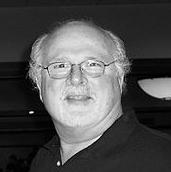

In [22]:
# load the image
id_item = 789
img = load_img(path + test_df.iloc[id_item]["full_path"])
print (test_df.iloc[id_item])
img

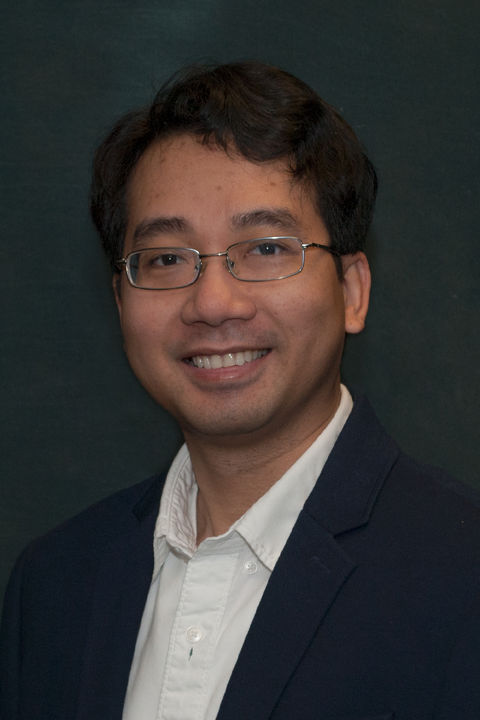

In [39]:
img = load_img("./nguyen_hien3.jpg")
img

In [40]:
img = img.resize((170, 170)) 
img_array = img_to_array(img)
img_array *= 1./255. 
img_array = img_array.reshape(1,170,170,3)

print(img_array.shape)

(1, 170, 170, 3)


In [41]:
result = model.predict(img_array)
result[0]

array([[0.42014533]], dtype=float32)

In [42]:
result[1]

array([[0.7044314]], dtype=float32)

In [43]:
age_scaler.inverse_transform([result[0][0]])

array([[41.59438795]])